### Load data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle

### Latent Analysis

In [3]:
with open('output/latent_analysis_divelo.pkl', 'rb') as f:
    divelo_latent = pickle.load(f)
    
with open('output/latent_analysis_expimap.pkl', 'rb') as f:
    expimap_latent = pickle.load(f)
    
with open('output/latent_analysis_ivelo.pkl', 'rb') as f:
    ivelo_latent = pickle.load(f)
    
with open('output/latent_analysis_velovi.pkl', 'rb') as f:
    velovi_latent = pickle.load(f)

In [4]:
divelo_latent

{'nmi': 0.691227743036894,
 'ari': 0.5937894479219675,
 'asw': 0.5260301735252142}

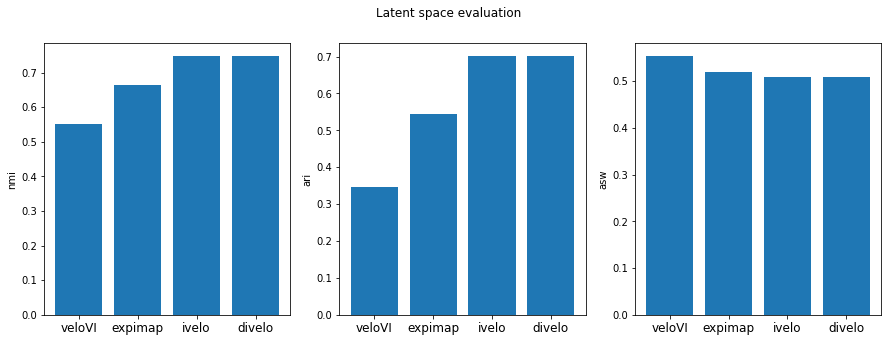

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Latent space evaluation')
models= ["veloVI", "expimap", "ivelo", "divelo"]
X_axis = np.arange(len(models))
#ax.set_xticks([1,4,5]) 
for ax in (ax1, ax2, ax3):
    ax.set_xticks(np.arange(len(models))) 
    ax.set_xticklabels(models, fontsize=12)
ax1.set(ylabel='nmi')
ax2.set(ylabel='ari')
ax3.set(ylabel='asw')
ax1.bar(X_axis, [velovi_latent["nmi"], expimap_latent["nmi"], ivelo_latent["nmi"], ivelo_latent["nmi"]])
ax2.bar(X_axis, [velovi_latent["ari"], expimap_latent["ari"], ivelo_latent["ari"], ivelo_latent["ari"]])
ax3.bar(X_axis, [velovi_latent["asw"], expimap_latent["asw"], ivelo_latent["asw"], ivelo_latent["asw"]])
plt.savefig("figures/latent_comparison/12_12_22")


### GP Analysis

In [48]:
#load dicts

with open('output/GP_analysis_divelo.pkl', 'rb') as f:
    divelo = pickle.load(f)
    
with open('output/GP_analysis_expimap.pkl', 'rb') as f:
    expimap = pickle.load(f)
    
with open('output/GP_analysis_ivelo.pkl', 'rb') as f:
    ivelo = pickle.load(f)

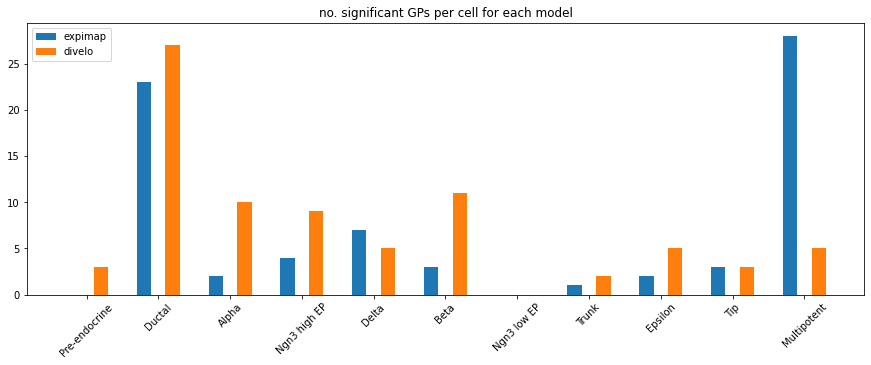

In [49]:
#plot no of sig GPs per cell

#expimap
cell_types=list(expimap.keys())
no_sig_GPs_expimap=[len(expimap[ct]["terms"]) for ct in cell_types]
#no_sig_GPs_ivelo=[len(ivelo[ct]["terms"]) for ct in cell_types]
no_sig_GPs_divelo=[len(divelo[ct]["terms"]) for ct in cell_types]

X_axis = np.arange(len(cell_types))

plt.figure(figsize=(15, 5))
plt.xticks(X_axis, cell_types, rotation = 45)

#add comparison of mult models
plt.title("no. significant GPs per cell for each model")
plt.bar(X_axis - 0.2, no_sig_GPs_expimap, 0.2, label = 'expimap')
#plt.bar(X_axis, no_sig_GPs_ivelo, 0.2, label = 'ivelo')
plt.bar(X_axis + 0.2, no_sig_GPs_divelo, 0.2, label = 'divelo')
plt.legend()
plt.savefig("figures/GP_comparison/no_sig_GPs")

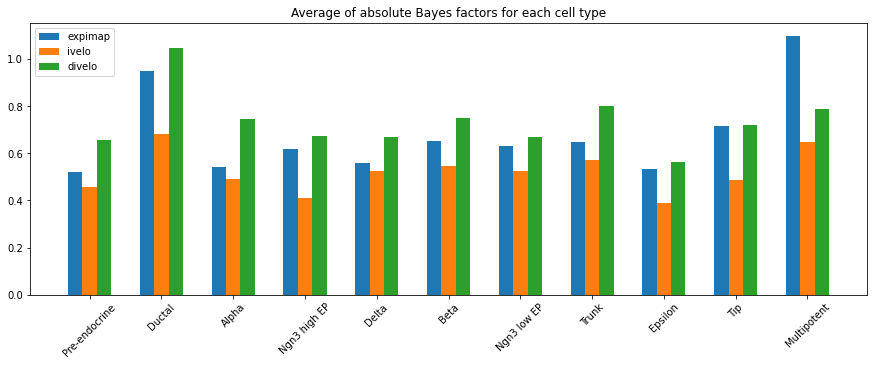

In [50]:
#plot no of sig GPs per cell

#expimap
cell_types=list(expimap.keys())
distr_divelo=[sum(abs(divelo[ct]["bf_scores"]))/len(divelo[ct]["bf_scores"]) for ct in cell_types]
distr_ivelo=[sum(abs(ivelo[ct]["bf_scores"]))/len(ivelo[ct]["bf_scores"]) for ct in cell_types]
distr_expimap=[sum(abs(expimap[ct]["bf_scores"]))/len(expimap[ct]["bf_scores"]) for ct in cell_types]

X_axis = np.arange(len(cell_types))

plt.figure(figsize=(15, 5))
plt.xticks(X_axis, cell_types, rotation = 45)

#add comparison of mult models
plt.title("Average of absolute Bayes factors for each cell type")
plt.bar(X_axis - 0.2, distr_expimap, 0.2, label = 'expimap')
plt.bar(X_axis, distr_ivelo, 0.2, label = 'ivelo')
plt.bar(X_axis + 0.2, distr_divelo, 0.2, label = 'divelo')
plt.legend()
plt.savefig("figures/GP_comparison/distr_bf")

In [ ]:
#Distribution of bfs - histogram for each model (x axis is bf scores across cells)

cell_types=list(divelo.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Distibution of Bayes factors for each cell type', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    #idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_acc"][i] for i in idx_expimap]
    #xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    #plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_accuracy_shared2")

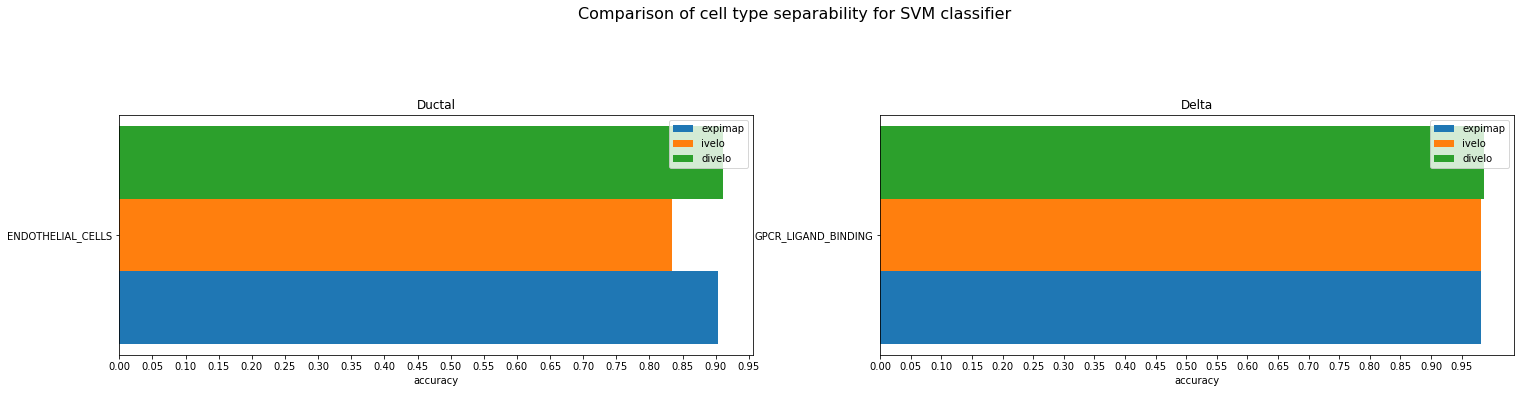

In [67]:
shared_GPs={}
for ct in expimap.keys():
    shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    #hared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)

#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_acc"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_accuracy_1")

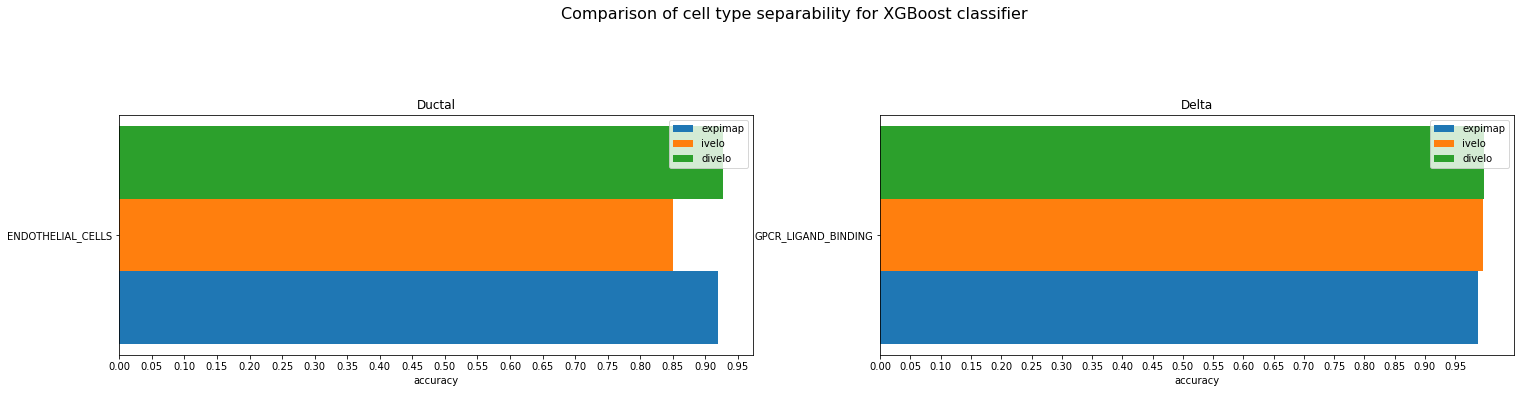

In [70]:
shared_GPs={}
for ct in expimap.keys():
    shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    #hared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)

#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_acc"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_accuracy_1")

In [60]:
#### Comparison divelo and expimap

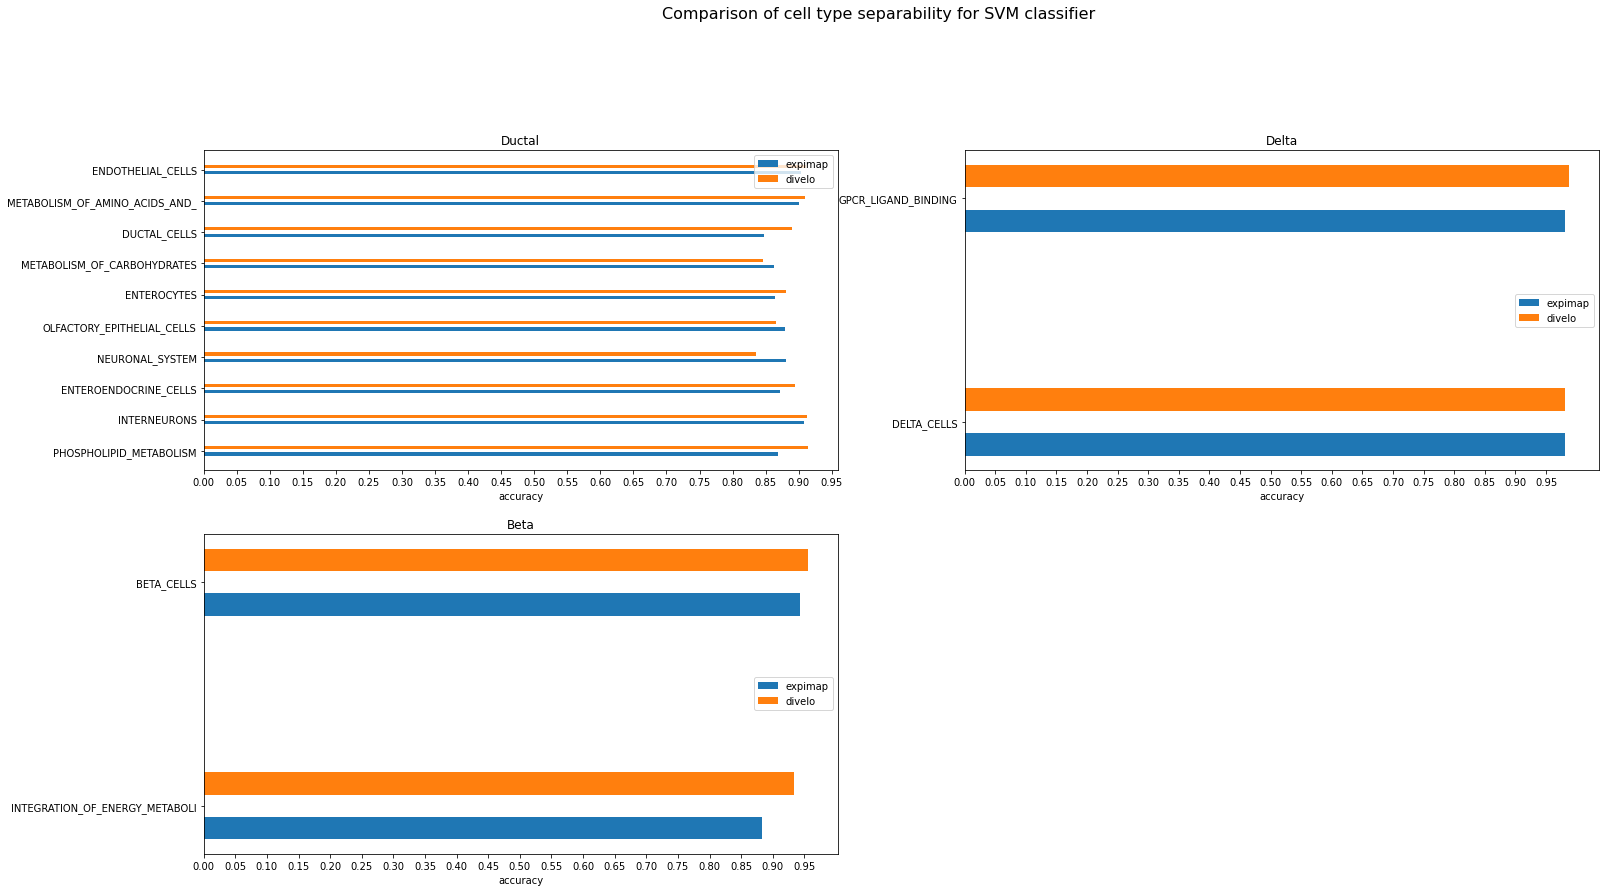

In [69]:
shared_GPs={}
for ct in expimap.keys():
    #shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    shared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)
        
#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    #idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_acc"][i] for i in idx_expimap]
    #xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    #plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_accuracy_2")

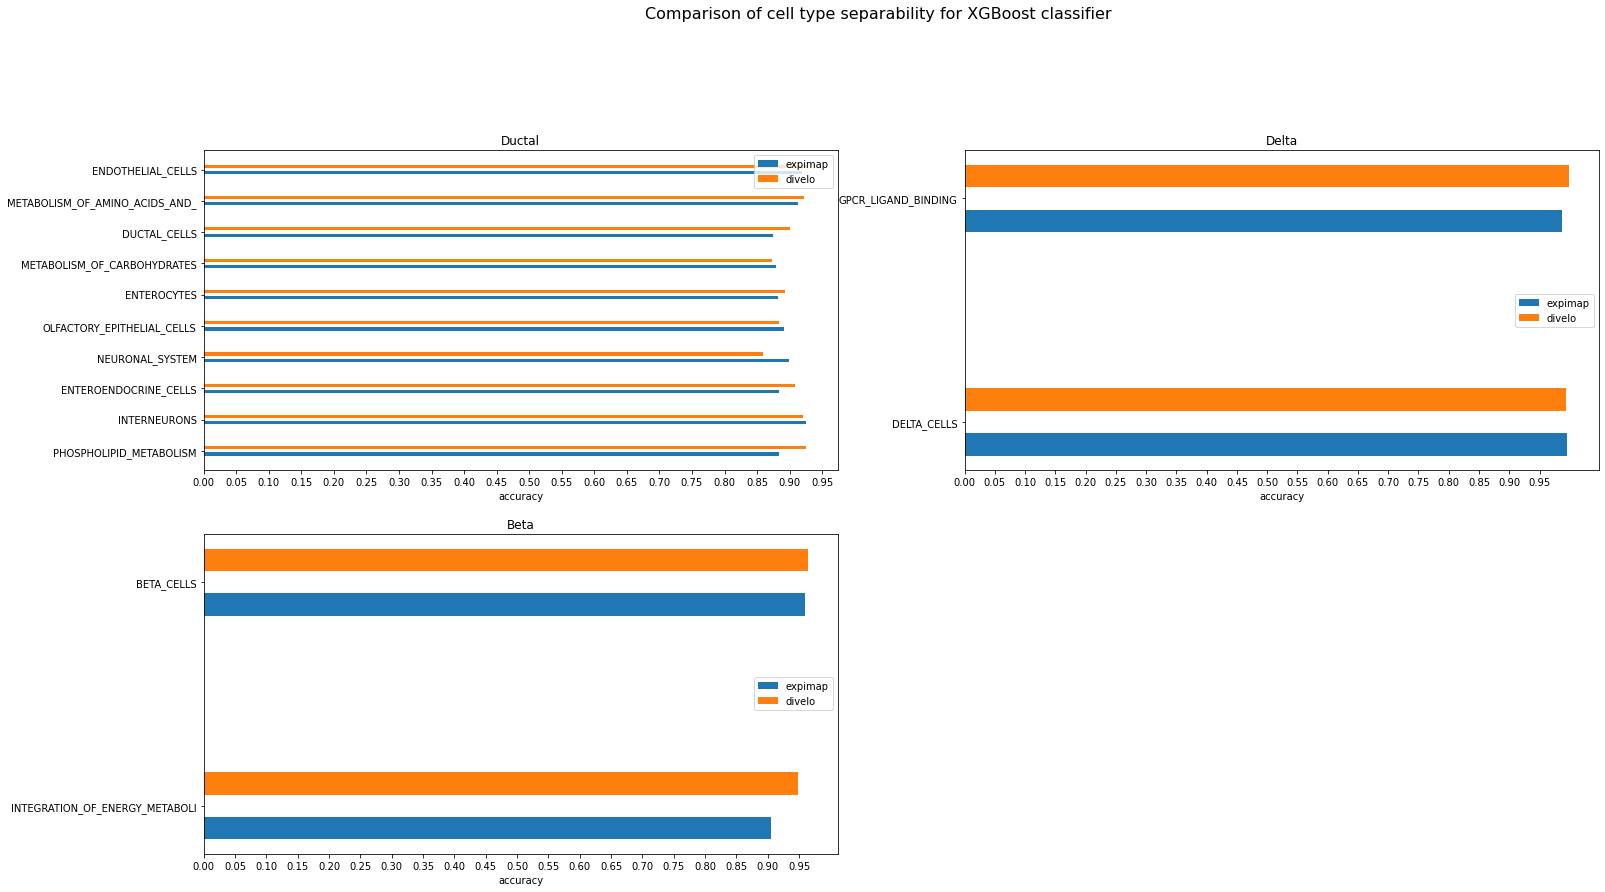

In [71]:
shared_GPs={}
for ct in expimap.keys():
    #shared_set=set(expimap[ct]["terms"]).intersection(set(ivelo[ct]["terms"]), set(divelo[ct]["terms"]))
    shared_set=set(expimap[ct]["terms"]).intersection(set(divelo[ct]["terms"]))
    if bool(shared_set):
        shared_GPs[ct]=list(shared_set)
        
#shared GPs
#plot accuracies per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(25, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    #idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_acc"][i] for i in idx_expimap]
    #xvals_ivelo = [ivelo[ct]["SVM_acc"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_acc"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    #plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_accuracy_2")

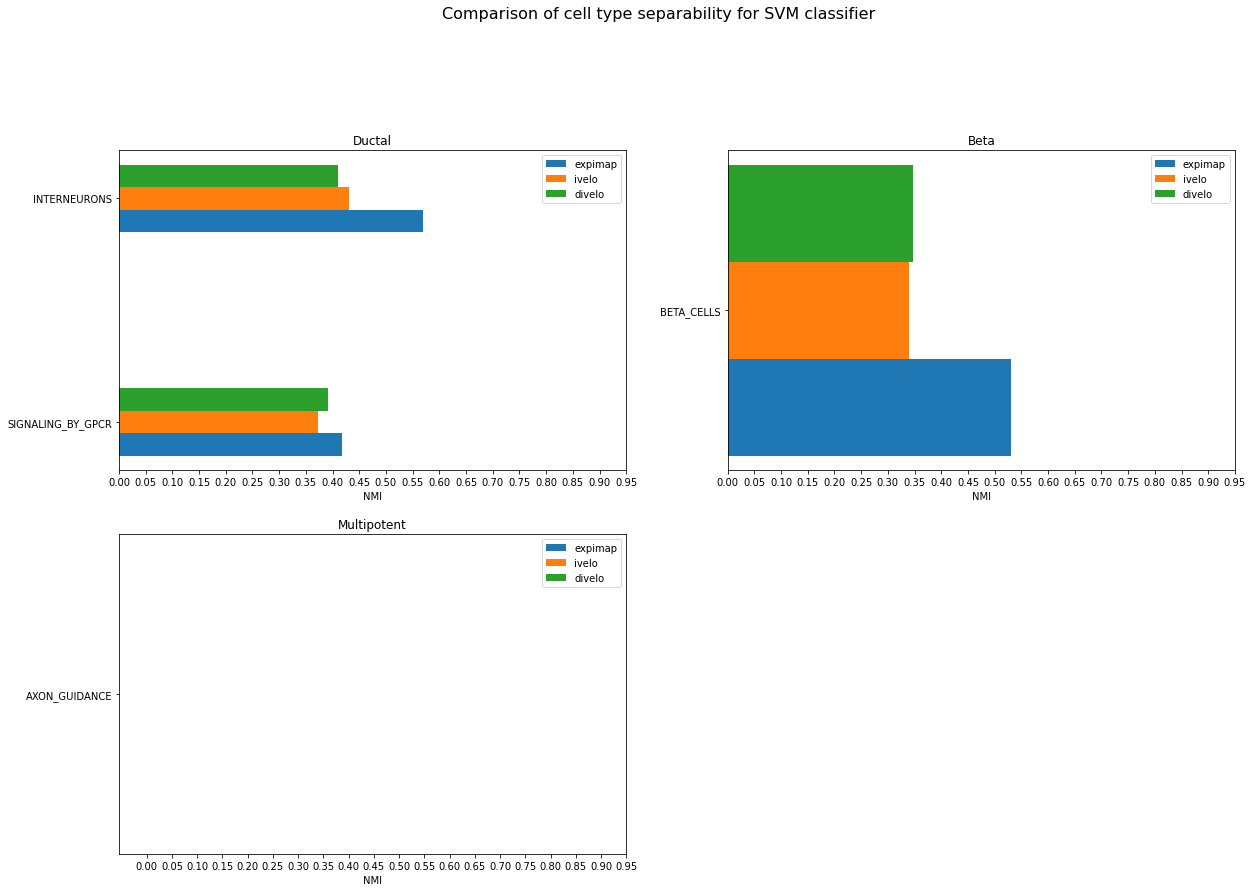

In [82]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("NMI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_NMI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_NMI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_NMI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_NMI_shared")

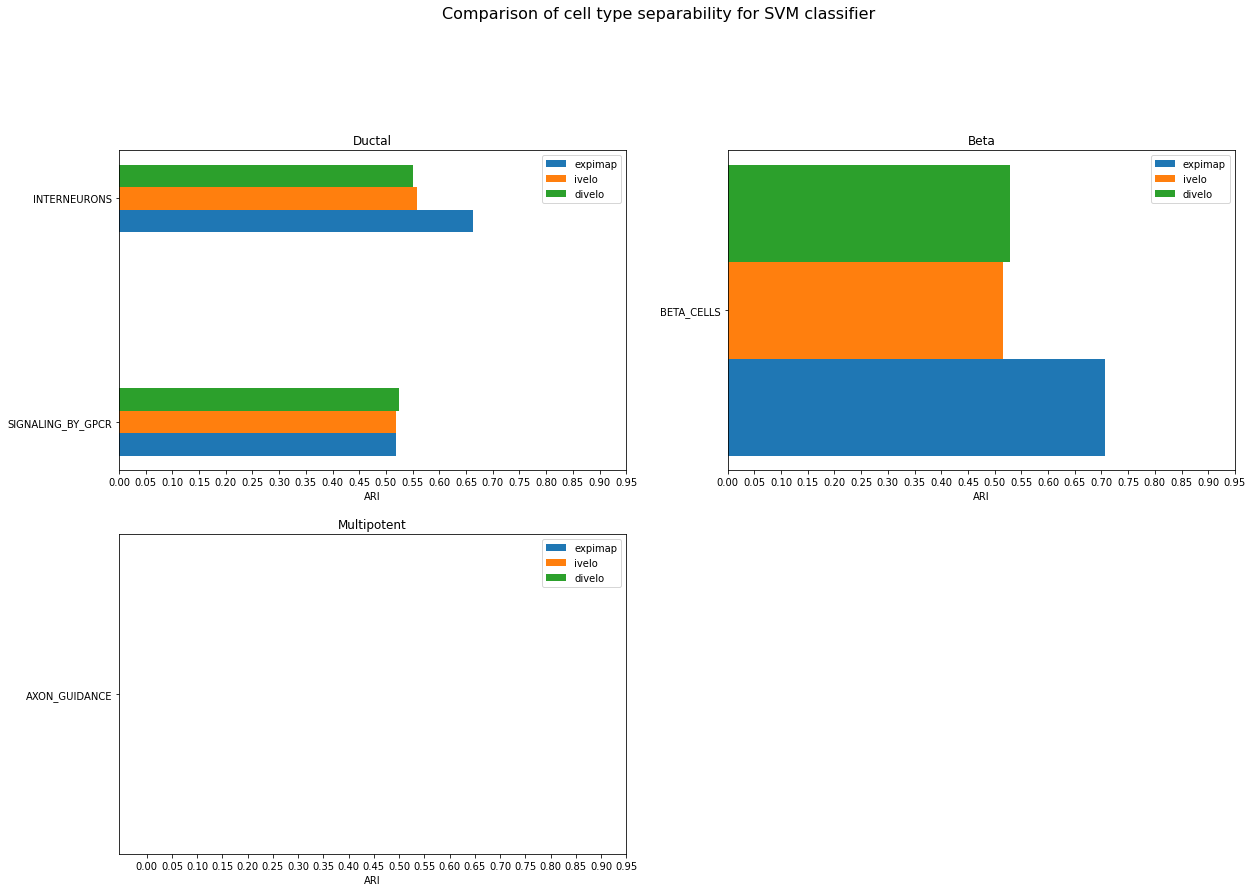

In [83]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ARI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_ARI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_ARI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_ARI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_ARI_shared")

IndexError: list index out of range

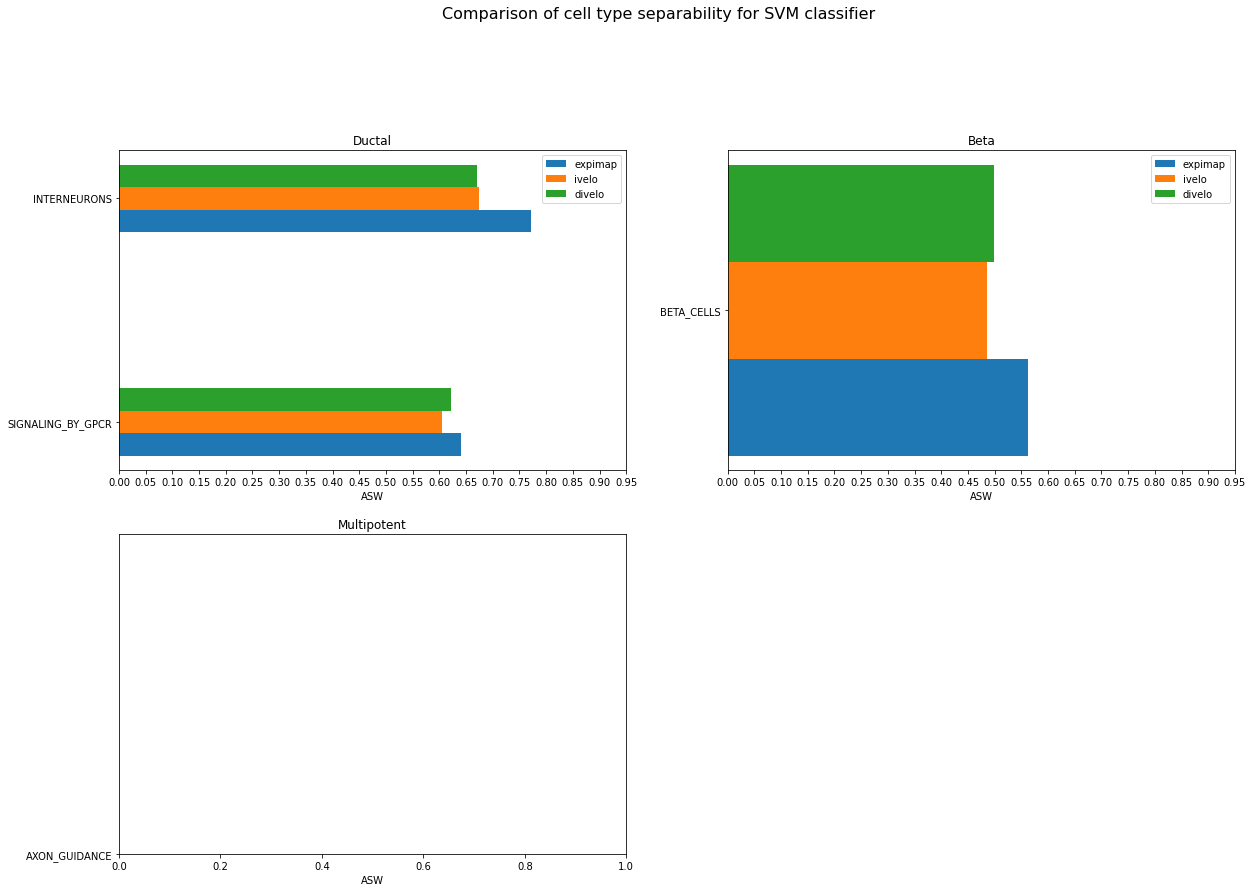

In [84]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for SVM classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ASW")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["SVM_ASW"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["SVM_ASW"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["SVM_ASW"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/SVM_ASW_shared")

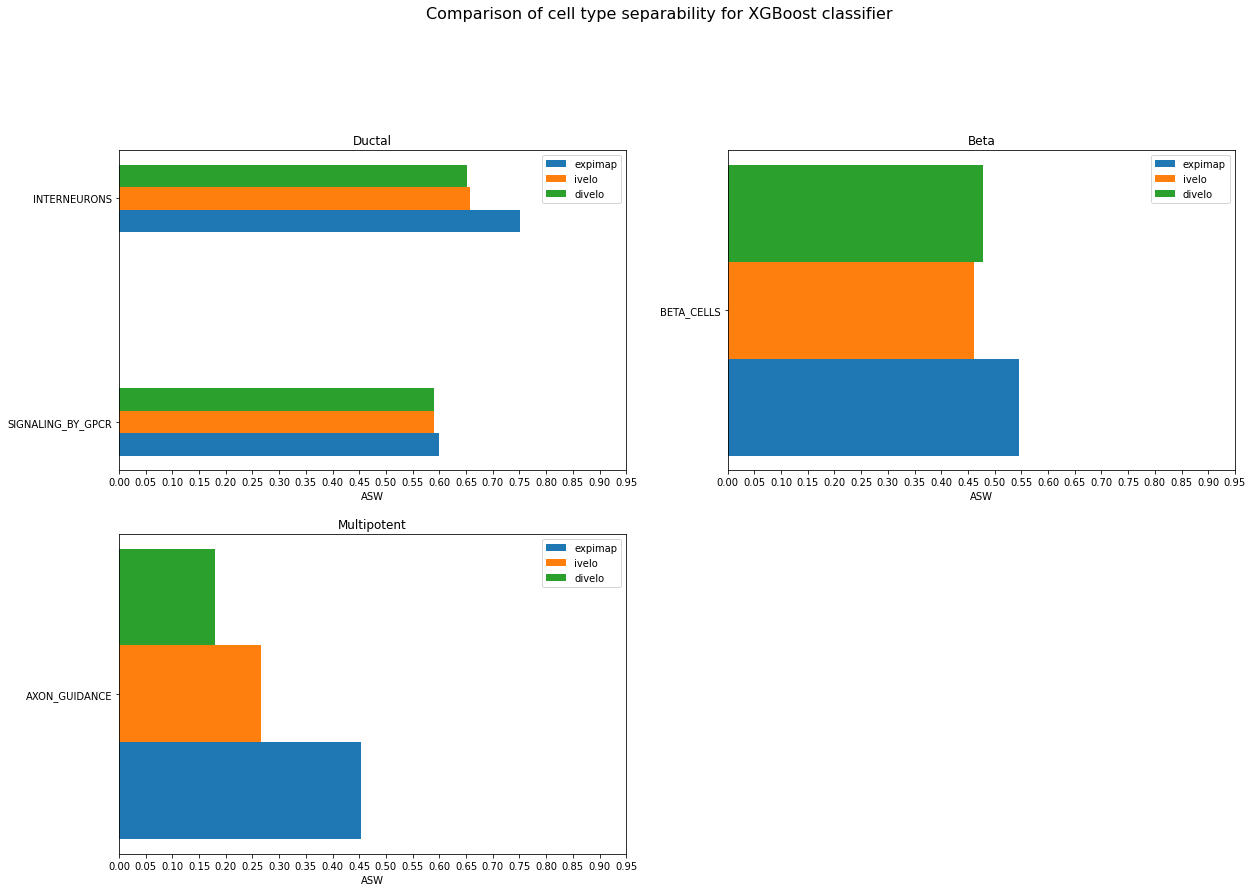

In [85]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ASW")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_ASW"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_ASW"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_ASW"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_ASW_shared")

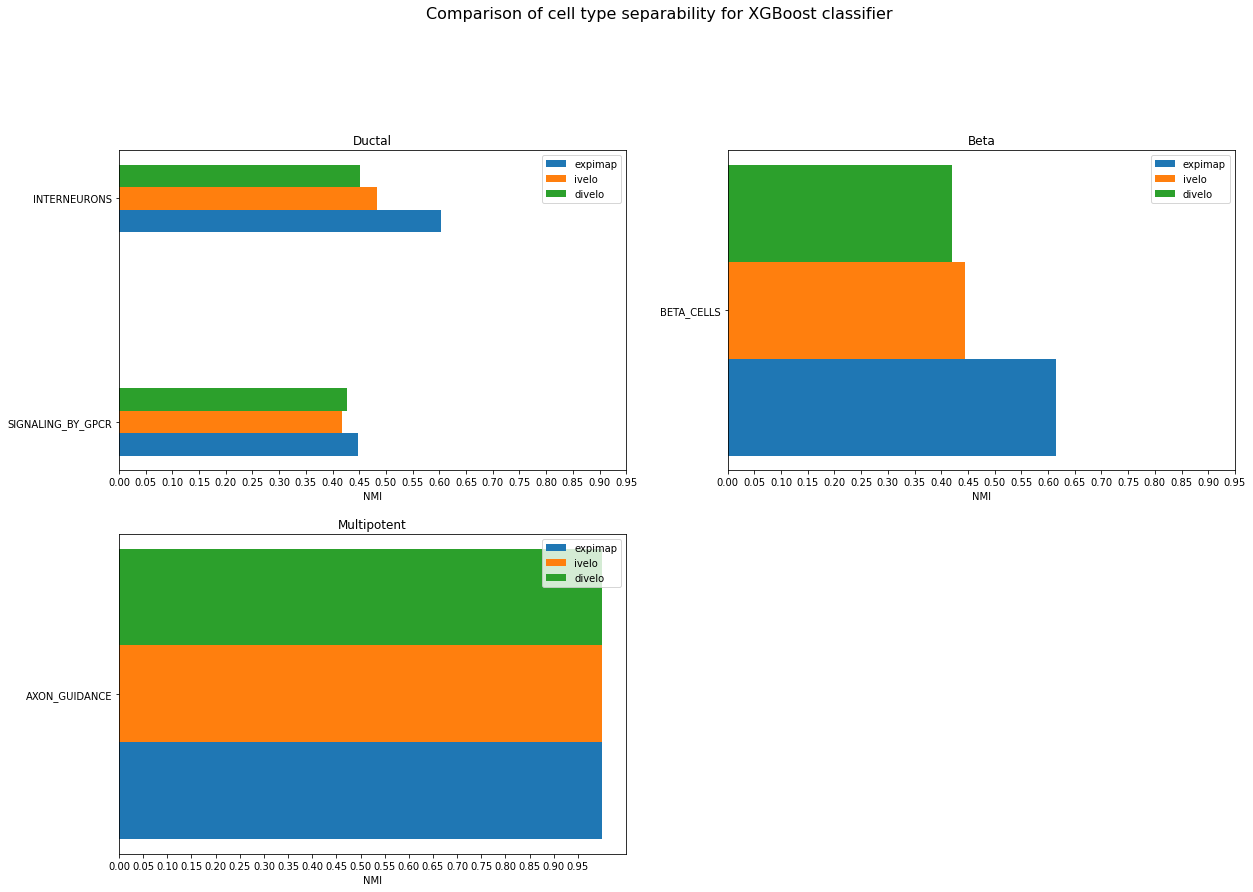

In [86]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("NMI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_NMI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_NMI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_NMI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_NMI_shared")

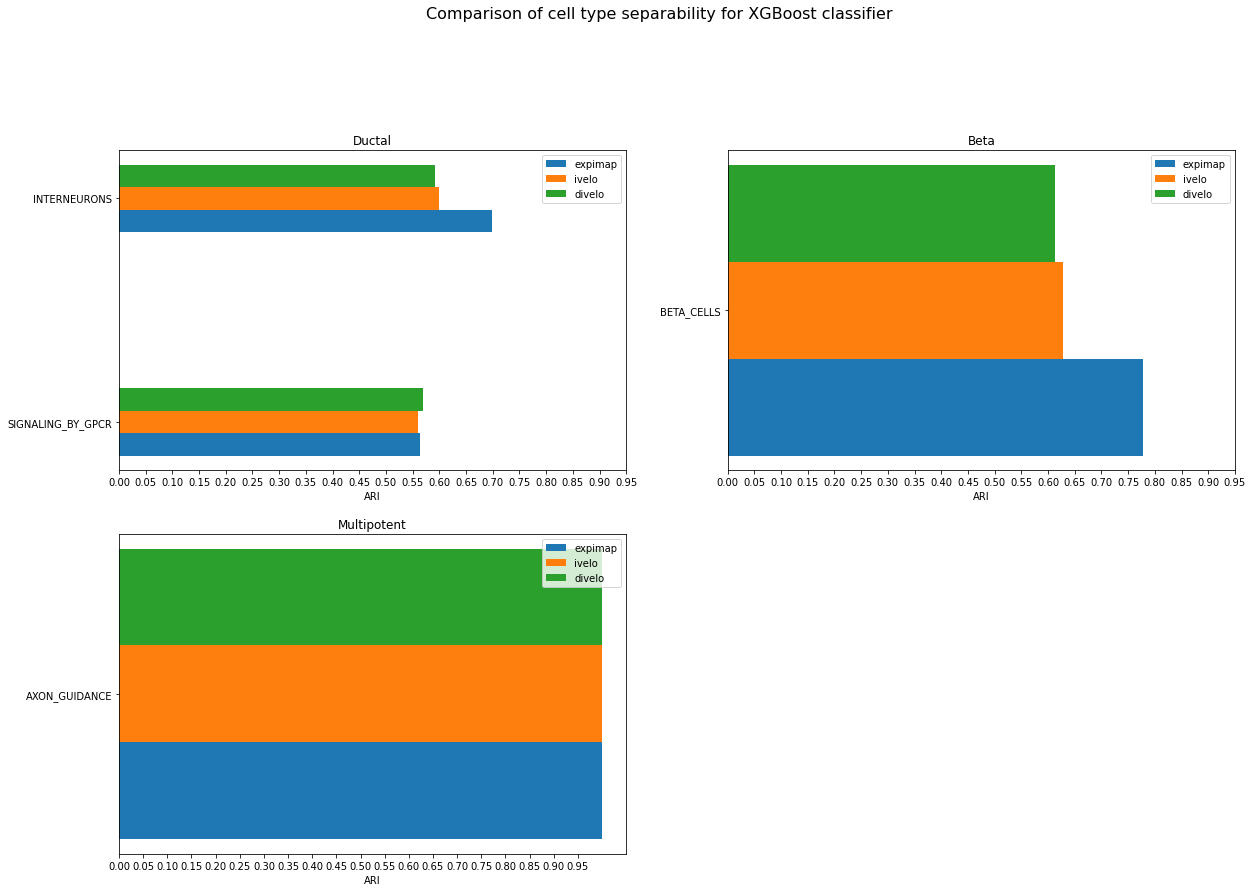

In [87]:
#shared GPs
#plot NMI per cell
cell_types=list(shared_GPs.keys())
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Comparison of cell type separability for XGBoost classifier', fontsize=16)

for i, ct in enumerate(cell_types):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("ARI")
    plt.title(f"{ct}")
    
    idx_expimap = [list(expimap[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_ivelo = [list(ivelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    idx_divelo = [list(divelo[ct]["terms"]).index(term) for term in shared_GPs[ct]]
    
    ind = np.arange(len(shared_GPs[ct]))

    
    plt.yticks(ind, shared_GPs[ct])

    xvals_expimap = [expimap[ct]["XGB_ARI"][i] for i in idx_expimap]
    xvals_ivelo = [ivelo[ct]["XGB_ARI"][i] for i in idx_ivelo] 
    xvals_divelo = [divelo[ct]["XGB_ARI"][i] for i in idx_divelo] 
    plt.barh(ind-0.1, height=0.1, width = xvals_expimap, label="expimap")
    plt.barh(ind, height=0.1, width = xvals_ivelo, label="ivelo")
    plt.barh(ind+0.1, height=0.1, width = xvals_divelo, label="divelo")
    plt.xticks(np.arange(0, 1, 0.05))
    plt.legend()
    plt.savefig("figures/GP_comparison/XGB_ARI_shared")

In [ ]:
#plot accuracies per cell for SVM
from matplotlib import pyplot as plt
plt.figure(figsize=(40,18))
plt.title("SVM accuracy scored on training data for significant GPs")
cell_types1=["Trunk","Alpha","Beta","Epsilon", "Tip"]
for i, ct in enumerate(cell_types1):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")

    ind =expimap[ct]["terms"]
    xvals_expimap = expimap[ct]["acc"]
    plt.barh(ind, width = xvals_expimap)
    plt.savefig("figures/GP_comparison/acc_expimap1")

In [ ]:
#plot accuracies per cell
plt.figure(figsize=(40,30))
plt.title("SVM accuracy scored on training data for significant GPs")
cell_types2=["Ductal","Delta","Multipotent"]
for i, ct in enumerate(cell_types2):
    
    plt.subplot(3,2,i+1)
    plt.xlabel("accuracy")
    plt.title(f"{ct}")

    ind =expimap[ct]["terms"]
    xvals_expimap = expimap[ct]["acc"]
    plt.barh(ind, width = xvals_expimap)
plt.savefig("figures/GP_comparison/acc_expimap2")

In [ ]:
sum(divelo["Ductal"]["acc"])/len(divelo["Ductal"]["acc"])

In [ ]:
sum(expimap["Ductal"]["acc"])/len(expimap["Ductal"]["acc"])

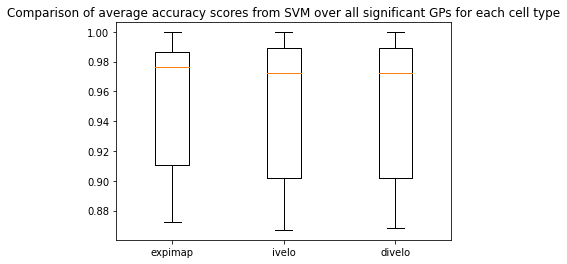

In [89]:
# Plot score distributions for SVM acc
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["SVM_acc"])/len(expimap[ct]["SVM_acc"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["SVM_acc"])/len(ivelo[ct]["SVM_acc"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["SVM_acc"])/len(divelo[ct]["SVM_acc"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average accuracy scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_acc")

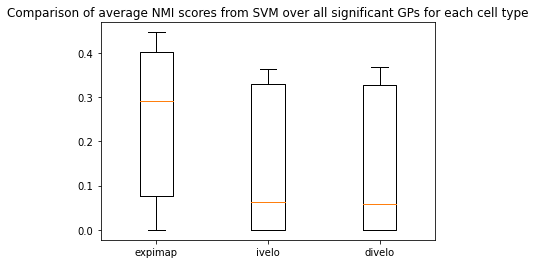

In [90]:
# Plot score distributions for SVM NMI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["SVM_NMI"])/len(expimap[ct]["SVM_NMI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["SVM_NMI"])/len(ivelo[ct]["SVM_NMI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["SVM_NMI"])/len(divelo[ct]["SVM_NMI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average NMI scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_NMI")

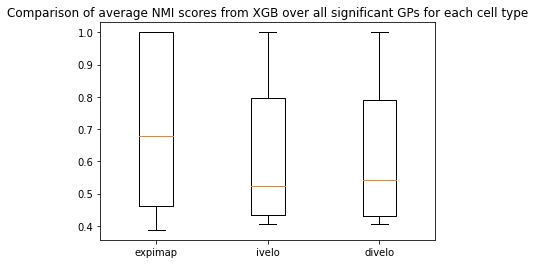

In [99]:
# Plot score distributions for XGB NMI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["XGB_NMI"])/len(expimap[ct]["XGB_NMI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["XGB_NMI"])/len(ivelo[ct]["XGB_NMI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["XGB_NMI"])/len(divelo[ct]["XGB_NMI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average NMI scores from XGB over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_XGB_NMI")

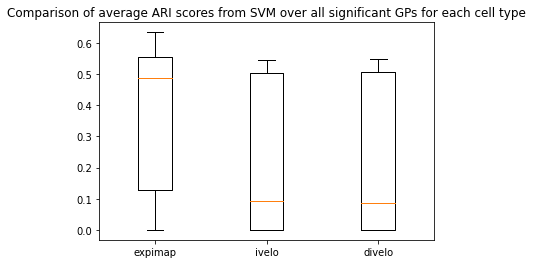

In [91]:
# Plot score distributions for SVM ARI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["SVM_ARI"])/len(expimap[ct]["SVM_ARI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["SVM_ARI"])/len(ivelo[ct]["SVM_ARI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["SVM_ARI"])/len(divelo[ct]["SVM_ARI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ARI scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_ARI")

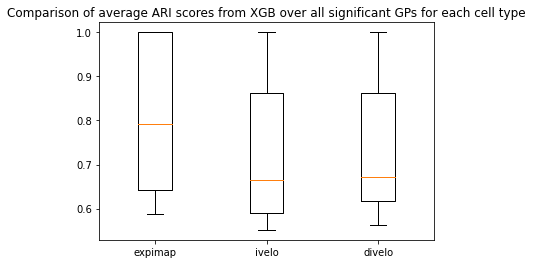

In [100]:
# Plot score distributions for XGB ARI
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        avg_expimap.append(sum(expimap[ct]["XGB_ARI"])/len(expimap[ct]["XGB_ARI"]))
    if len(ivelo[ct]["terms"])!=0:
        avg_ivelo.append(sum(ivelo[ct]["XGB_ARI"])/len(ivelo[ct]["XGB_ARI"]))
    if len(divelo[ct]["terms"])!=0:
        avg_divelo.append(sum(divelo[ct]["XGB_ARI"])/len(divelo[ct]["XGB_ARI"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ARI scores from XGB over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_XGB_ARI")

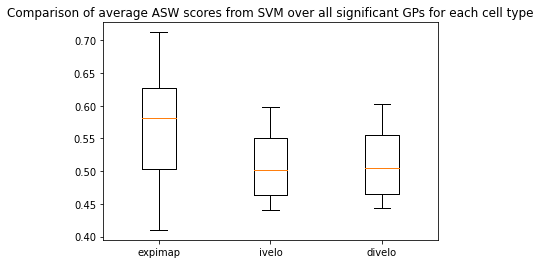

In [98]:
# Plot score distributions for SVM ASW
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        if len(expimap[ct]["SVM_ASW"])!=0:
            avg_expimap.append(sum(expimap[ct]["SVM_ASW"])/len(expimap[ct]["SVM_ASW"]))
    if len(ivelo[ct]["terms"])!=0:
        if len(ivelo[ct]["SVM_ASW"])!=0:
            avg_ivelo.append(sum(ivelo[ct]["SVM_ASW"])/len(ivelo[ct]["SVM_ASW"]))
    if len(divelo[ct]["terms"])!=0:
        if len(divelo[ct]["SVM_ASW"])!=0:
            avg_divelo.append(sum(divelo[ct]["SVM_ASW"])/len(divelo[ct]["SVM_ASW"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ASW scores from SVM over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_SVM_ASW")

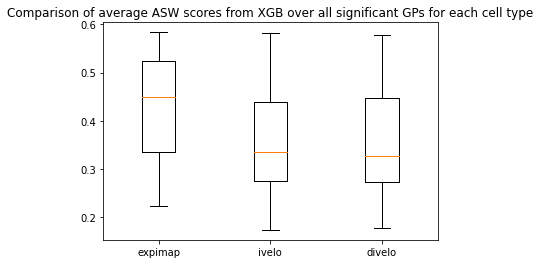

In [102]:
# Plot score distributions for XGB ASW
import pandas as pd
avg_expimap=[]
avg_ivelo=[]
avg_divelo=[]
for ct in expimap.keys():
    if len(expimap[ct]["terms"])!=0:
        if len(expimap[ct]["XGB_ASW"])!=0:
            avg_expimap.append(sum(expimap[ct]["XGB_ASW"])/len(expimap[ct]["XGB_ASW"]))
    if len(ivelo[ct]["terms"])!=0:
        if len(ivelo[ct]["XGB_ASW"])!=0:
            avg_ivelo.append(sum(ivelo[ct]["XGB_ASW"])/len(ivelo[ct]["XGB_ASW"]))
    if len(divelo[ct]["terms"])!=0:
        if len(divelo[ct]["XGB_ASW"])!=0:
            avg_divelo.append(sum(divelo[ct]["XGB_ASW"])/len(divelo[ct]["XGB_ASW"]))
#accuracies=pd.DataFrame({"Box1": avg_expimap, "Box2": avg_ivelo, "Box3": avg_divelo})
                        
#accuracies[['Box1', 'Box2', 'Box3']].plot(kind='box', title='Comparison of average accuracy scores over all significant GPs for each cell type')                    

fig1, ax1 = plt.subplots()
ax1.set_title('Comparison of average ASW scores from XGB over all significant GPs for each cell type')
ax1.boxplot([avg_expimap, avg_ivelo, avg_divelo])
plt.xticks([1, 2, 3], ['expimap', 'ivelo', 'divelo'])
plt.savefig("figures/GP_comparison/score_distr_XGB_ASW")

In [ ]:
### Comparison of velocity

In [ ]:
#Compare the MSE for unspliced and spliced counts between Velo_interpret and original 

import pandas as pd
pred=vae.get_expression_fit()
pred_s=pred[0]
pred_u=pred[1]
GT_s=adata.layers["Ms"]
GT_u=adata.layers["Mu"]
MSE_s=np.mean((pred_s-GT_s)**2, axis=0)
MSE_u=np.mean((pred_u-GT_u)**2, axis=0)

velo_interpret_single_MSE=pd.DataFrame([MSE_s,MSE_u]).T

velo_interpret_single_MSE.to_csv("MSE_velo_interpret_single.csv")

# #Read in saved MSE from velovi_orig
# velo_orig_MSE=pd.read_csv("MSE_velovi_orig.csv", index_col="index")

# #Calculate log10 MSE ratios
# log10MSE_s=np.log10(velo_orig_MSE["0"]/velo_interpret_MSE[0])
# log10MSE_u=np.log10(velo_orig_MSE["1"]/velo_interpret_MSE[1])
# log10MSE_s=log10MSE_s.dropna()
# log10MSE_u=log10MSE_u.dropna()

# #Combine MSE for spliced and unspliced into 1 dataframe
# MSE_combined=pd.DataFrame([log10MSE_s,log10MSE_u]).T
# MSE_combined=MSE_combined.rename(columns={0:"spliced",1:"unspliced"})

In [ ]:
#Get violin plot of log10 MSEs
ax=sns.violinplot(data=MSE_combined)
ax.set_title("Log10 MSE Ratio Velo_orig/Velo_interpret")
MSE_fig=ax.get_figure()
#MSE_fig.savefig("figures/decoder2/log10MSE.png") 

In [ ]:
# velocity correlation

scvelo.utils.vcorrcoef(X, y, mode='pearsons', axis=-1)